In [9]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import scale
import sklearn as sl


In [26]:
cluster1=pd.read_csv(r'Documents/universities.csv')

In [27]:
cluster.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3


In [28]:
cluster.shape


(25, 8)

In [29]:
type(cluster)

pandas.core.frame.DataFrame

In [30]:
norm=scale(cluster.iloc[:,1:])
#scaling the data to normalize the data i.e to make the data same

In [31]:
type(norm)
#ndarry is an n dimentional array

numpy.ndarray

In [32]:
#make the dataset after scaling the data
norm = pd.DataFrame(norm)
type(norm)

pandas.core.frame.DataFrame

In [33]:
norm.head()

,0,1,2,3,4,5,6
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303,0.571126
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524,-0.268765
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634,1.411018
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229,0.571126
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587,0.571126


In [34]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

In [35]:
z = linkage(norm, method="complete",metric="euclidean")
z1 = linkage(norm, method="average",metric="euclidean")

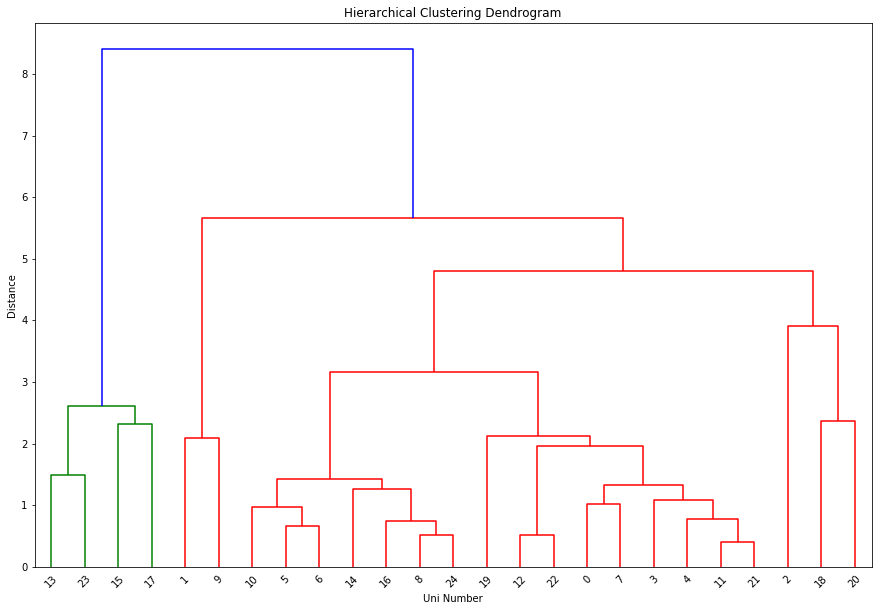

In [36]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Uni Number')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
hcluster=AgglomerativeClustering(n_clusters=5, linkage='average', affinity="euclidean").fit(norm)
hcluster.labels_

array([4, 1, 3, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 0, 4, 0, 4, 0, 2, 4, 2, 4,
       4, 0, 4], dtype=int64)

In [39]:
cluster_no = pd.DataFrame(hcluster.labels_)
(cluster_no)

,0
0,4
1,1
2,3
3,4
4,4
5,4
6,4
7,4
8,4
9,1


In [44]:
#adding cluster   to the dataset
cluster1['cluster']=cluster_no
cluster1.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,4
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,4
4,Cornell,1280,83,33,13,21864,90,4


In [46]:
norm1 = cluster1.iloc[:,[7,0,1,2,3,4,5,6]]
norm1.head()

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,4,Brown,1310,89,22,13,22704,94
1,1,CalTech,1415,100,25,6,63575,81
2,3,CMU,1260,62,59,9,25026,72
3,4,Columbia,1310,76,24,12,31510,88
4,4,Cornell,1280,83,33,13,21864,90


In [48]:
cluster1.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,4
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,4
4,Cornell,1280,83,33,13,21864,90,4


In [49]:
norm1.head()

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,4,Brown,1310,89,22,13,22704,94
1,1,CalTech,1415,100,25,6,63575,81
2,3,CMU,1260,62,59,9,25026,72
3,4,Columbia,1310,76,24,12,31510,88
4,4,Cornell,1280,83,33,13,21864,90


In [50]:
# getting aggregate mean of each cluster
norm1.iloc[:,2:].groupby(norm1.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1061.5000,38.75,70.0,19.250,9953.000,71.750
1,1360.0000,87.50,34.5,6.500,61133.000,84.000
2,1210.0000,80.00,54.0,16.500,15305.000,81.500
3,1260.0000,62.00,59.0,9.000,25026.000,72.000
4,1313.4375,85.00,29.0,11.625,29186.625,92.375
